<a href="https://colab.research.google.com/github/Abdul-AI-creator/Abdul-AI-creator/blob/main/TF_Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets ,layers ,models
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(X_train ,Y_train),(X_test ,Y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:

X_train.shape

(50000, 32, 32, 3)

In [6]:
Y_train.shape

(50000, 1)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:

Y_test.shape

(10000, 1)

In [9]:
Y_train =Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
Y_test =Y_test.reshape(-1,)
Y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [24]:
classes =['airaplane','automobile','bird','cat','deer','dog','frog','ship','truck']

In [25]:
def plot_sample(X, Y ,index):
  plt.figure(figsize=(16,4))
  plt.imshow(X[index])
  plt.xlabel(classes[Y[index]])

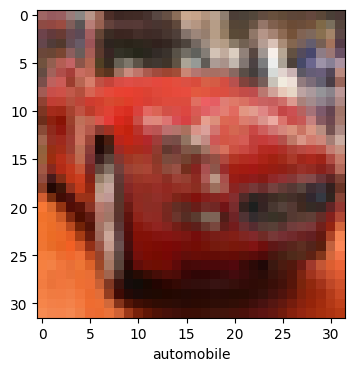

In [26]:
plot_sample(X_train ,Y_train ,5)

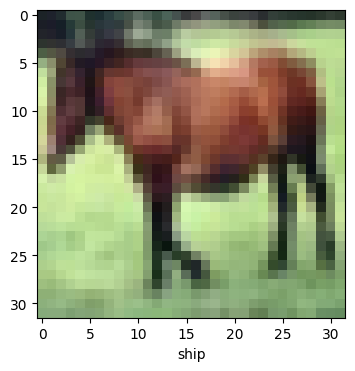

In [28]:
plot_sample(X_train ,Y_train ,7)

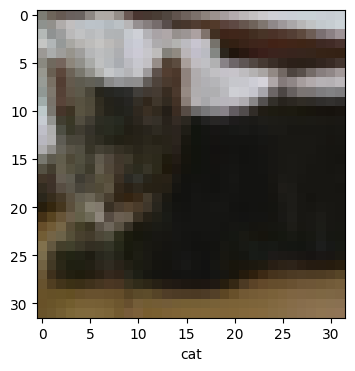

In [30]:
plot_sample(X_train ,Y_train ,9)

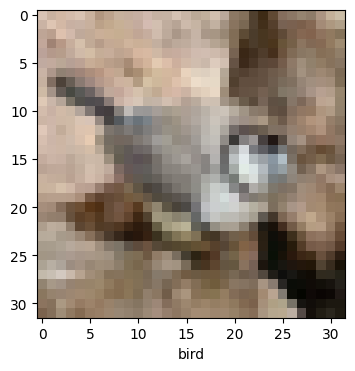

In [31]:
plot_sample(X_train ,Y_train ,90)

**Normalize the data**

In [32]:
X_train =X_train/255.0
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [37]:
X_train.min() ,X_train.max(),X_train.mean()

(0.0, 1.0, 0.4733630004850874)

In [33]:
X_test =X_test/255.0

In [40]:
ann =models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000 ,activation='relu'),
    layers.Dense(1000 ,activation='relu'),
    layers.Dense(10 ,activation='softmax')
])

ann.compile(
    optimizer ='SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy'])
ann.fit(X_train ,Y_train , epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 153s 97ms/step - accuracy: 0.3040 - loss: 1.9282
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 95ms/step - accuracy: 0.4213 - loss: 1.6469
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.4521 - loss: 1.5556
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 92ms/step - accuracy: 0.4714 - loss: 1.4891
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 94ms/step - accuracy: 0.4956 - loss: 1.4340


In [42]:
from sklearn.metrics import confusion_matrix ,classification_report
import numpy as np
y_pred =ann.predict(X_test)
y_pred_classes =[np.argmax(element) for element in y_pred]
print('Classification report: \n',classification_report(Y_test ,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.64      0.43      0.52      1000
           1       0.53      0.69      0.60      1000
           2       0.26      0.61      0.37      1000
           3       0.43      0.08      0.13      1000
           4       0.49      0.24      0.32      1000
           5       0.41      0.39      0.40      1000
           6       0.62      0.36      0.46      1000
           7       0.41      0.69      0.51      1000
           8       0.74      0.46      0.57      1000
           9       0.51      0.60      0.55      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.44     10000
weighted avg       0.50      0.46      0.44     10000



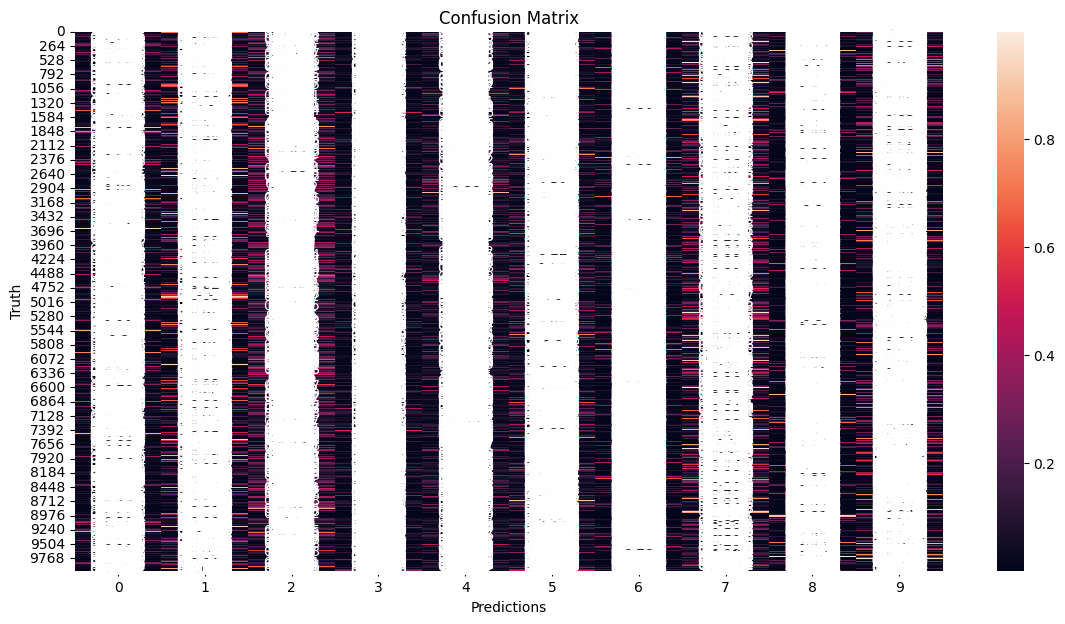

In [43]:
import seaborn as sns
plt.figure(figsize=(14,7))
sns.heatmap(y_pred ,annot=True)
plt.ylabel('Truth')
plt.xlabel('Predictions')
plt.title('Confusion Matrix')
plt.show()

**CNN Model to train images**

In [46]:
cnn=models.Sequential([
    layers.Conv2D(filters=32 ,kernel_size=(3, 3) ,activation='relu' ,input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32 ,kernel_size= (3, 3) ,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64 ,activation='relu'),
    layers.Dense(10 ,activation='softmax')
])
cnn

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential_4, built=True>

In [47]:
cnn.compile(optimizer ='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [48]:
cnn.fit(X_train ,Y_train ,epochs =10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.3718 - loss: 1.7294
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.5803 - loss: 1.1935
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.6348 - loss: 1.0452
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.6641 - loss: 0.9636
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 52ms/step - accuracy: 0.6886 - loss: 0.8881
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7029 - loss: 0.8426
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7242 - loss: 0.7993
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.7333 - loss: 0.7644
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 38ms/step - accuracy: 0.7484 - loss: 0.7238
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.7600 - loss: 0.6921


In [49]:
cnn.evaluate(X_test ,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6847 - loss: 0.9414


[0.9471029043197632, 0.6848000288009644]

In [51]:
y_pred =cnn.predict(X_test)
y_pred[:4]

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


array([[1.6252397e-04, 5.6080207e-06, 6.8880018e-04, 7.4800152e-01,
        7.1001165e-03, 2.3172282e-01, 1.0377854e-02, 6.9459056e-05,
        1.8020234e-03, 6.9287169e-05],
       [1.5999336e-02, 7.5227010e-01, 1.5505178e-05, 3.2416331e-06,
        1.2472063e-05, 4.7962192e-07, 5.8976088e-06, 1.0523398e-08,
        2.2935253e-01, 2.3404721e-03],
       [1.8001030e-01, 2.9292795e-01, 1.2864947e-02, 5.7684179e-02,
        6.5665492e-03, 7.7321390e-03, 1.2420008e-03, 6.1990819e-03,
        3.3122456e-01, 1.0354829e-01],
       [8.3029407e-01, 4.0250266e-04, 6.2660478e-02, 2.0013254e-03,
        1.8027069e-02, 1.5685229e-05, 2.8705949e-04, 2.7183897e-04,
        8.5868031e-02, 1.7189691e-04]], dtype=float32)

In [50]:
y_classes =[np.argmax(element) for element in y_pred]
y_classes[:4]

[3, 9, 8, 0]

In [52]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

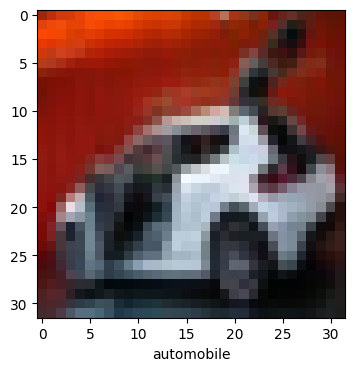

In [53]:
plot_sample(X_test ,Y_test ,6)

In [53]:
classes[y_classes[4]]